<a href="https://colab.research.google.com/github/14marcos1/Geral01/blob/main/ELT574_MATRICULA_51687_ATIVIDADE_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Importação das bibliotecas**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples


**2- Carregamento do conjunto de dados**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving musicas_spotify_limpo.csv to musicas_spotify_limpo (1).csv


In [ ]:
# df = pd.read_csv('musicas_spotify_limpo.csv')
df = pd.read_csv("musicas_spotify_limpo.csv")
df.head()


,danceability,energy,loudness,tempo,valence
0,0.786,0.667,-8.272,102.046,0.688
1,0.571,0.739,-11.163,93.105,0.818
2,0.286,0.929,-8.494,99.762,0.127
3,0.725,0.607,-7.486,129.971,0.570
4,0.184,0.161,-18.261,86.351,0.087


**3- Seleção das variáveis e pré-processamento**

As variáveis utilizadas foram aquelas descritas no enunciado:

danceability

energy

loudness

tempo

valence

In [ ]:
features = ["danceability", "energy", "loudness", "tempo", "valence"]


df_sp = df[features].copy()
df_sp = df_sp.apply(pd.to_numeric, errors="coerce").dropna()


df_sp.describe()

,danceability,energy,loudness,tempo,valence
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.561148,0.635062,-8.069284,120.699930,0.488802
std,0.178634,0.242053,4.429160,31.233957,0.257159
min,0.109000,0.003770,-40.046000,63.047000,0.035900
25%,0.438750,0.487000,-9.510000,94.986750,0.279000
50%,0.579500,0.680000,-6.834500,115.235000,0.477500
75%,0.694250,0.830500,-5.206500,141.933250,0.696250
max,0.936000,0.997000,-2.228000,200.082000,0.973000


**4. Padronização dos dados**

In [ ]:
# Normalização dos dados (essencial para que o tempo/BPM não domine os outros valores)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Dados normalizados e prontos para o K-means.")

Dados normalizados e prontos para o K-means.


**5. Curva do cotovelo**

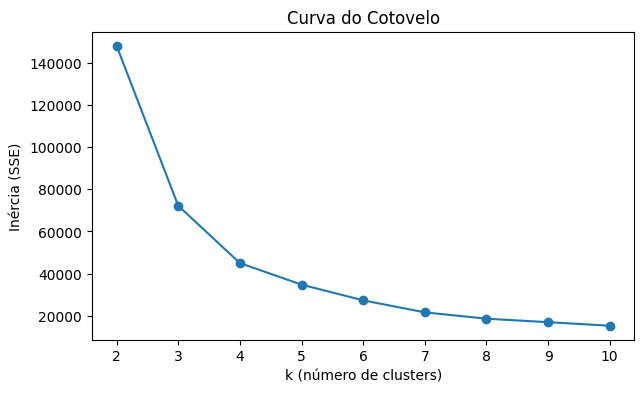

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

ks = range(2, 11)
inertias = []

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7,4))
plt.plot(list(ks), inertias, marker="o")
plt.xlabel("k (número de clusters)")
plt.ylabel("Inércia (SSE)")
plt.title("Curva do Cotovelo")
plt.show()


### Justificativa da escolha de k

A curva do cotovelo foi utilizada como etapa inicial para identificar um intervalo plausível de valores de k, observando o ponto a partir do qual a redução da inércia passa a ocorrer de forma menos significativa. Em seguida, o coeficiente de silhueta foi empregado para refinar essa escolha, pois avalia simultaneamente a coesão intra-cluster e a separação entre clusters, permitindo a seleção do modelo com melhor qualidade de agrupamento.


**7. Diagrama de silhueta para o melhor k**

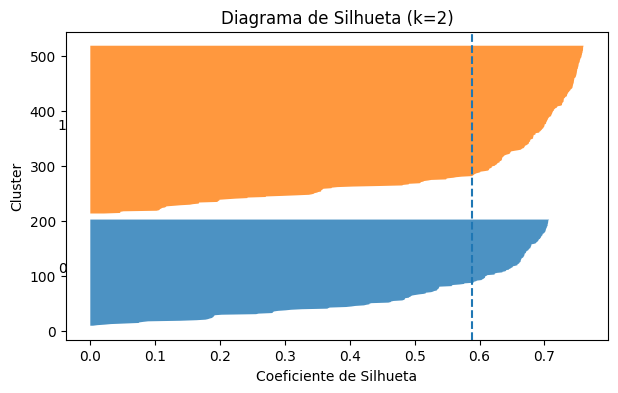

In [ ]:
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

def silhouette_plot(X, labels, k):
    sil_vals = silhouette_samples(X, labels)
    y_lower = 10

    plt.figure(figsize=(7,4))

    for i in range(k):
        ith = sil_vals[labels == i]
        ith.sort()
        size_i = ith.shape[0]
        y_upper = y_lower + size_i

        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith,
            alpha=0.8
        )
        plt.text(-0.05, y_lower + 0.5 * size_i, str(i))
        y_lower = y_upper + 10

    plt.axvline(np.mean(sil_vals), linestyle="--")
    plt.xlabel("Coeficiente de Silhueta")
    plt.ylabel("Cluster")
    plt.title(f"Diagrama de Silhueta (k={k})")
    plt.show()

# ---- Aplicando o modelo final ----
kmeans_best = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels_best = kmeans_best.fit_predict(X)

silhouette_plot(X, labels_best, best_k)


**8. Análise dos clusters**

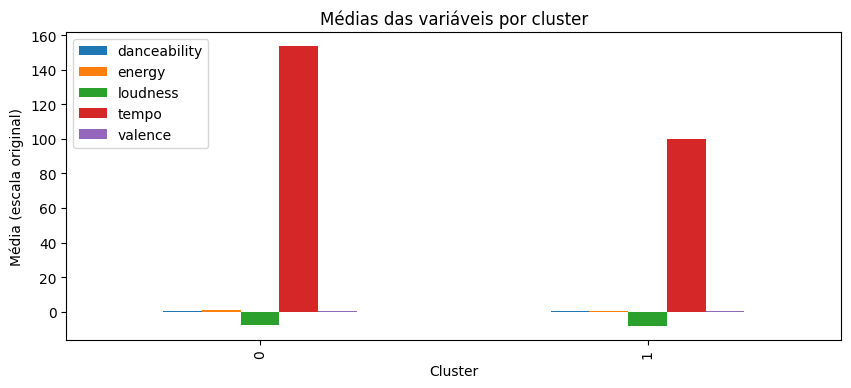

In [ ]:
df_result = df_sp.copy()
df_result["cluster"] = labels_best

perfil = df_result.groupby("cluster")[features].mean()
perfil
perfil.plot(kind="bar", figsize=(10,4))
plt.title("Médias das variáveis por cluster")
plt.xlabel("Cluster")
plt.ylabel("Média (escala original)")
plt.show()

**9. Conclusão**


Os clusters obtidos representam perfis musicais distintos, caracterizados por diferentes combinações de energia, dançabilidade, valência, volume e tempo. Dessa forma, o K-means mostrou-se adequado para segmentar faixas musicais com características semelhantes, possibilitando análises exploratórias e aplicações futuras, como recomendação musical e categorização de estilos.
